## Preâmbulo
### Importações e afins

In [1]:
%matplotlib inline

from PIL import Image
import numpy as np
import os
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns

### Arquivo de entrada e geração da imagem

In [2]:
arquivo = 'imagens/praiaOrig.png'

if os.path.isfile(arquivo):
    # Objeto Image + array da imagem original
    img = Image.open(arquivo)
    f = np.asarray(img)
    # Objeto Image + array da imagem convertida para tons de cinza
    img_cinza = img.convert('L')
    f_cinza = np.asarray(img_cinza)
else:
    print('Arquivo inexistente. Reexecute a célula, informando um arquivo correto')

#### Se desejar visualizar as imagens, execute a célula abaixo

In [3]:
img.show()
img_cinza.show()

### Declarações de funções
#### Geração de Histogramas

In [4]:
def histograma(f, L):
    h = np.zeros(L)
    
    for k in range(L):
        h[k] = np.sum(f == k)
        
    return h

def calcula_cdf(p):
    cdf = np.zeros(p.shape)
    
    for k in range(len(p)):
        cdf[k] = np.sum(p[:k+1])
        
    return cdf

def gera_histogramas(f, L):
    # Contagem de pixels da imagem
    n = f.shape[0] * f.shape[1]
    
    h = histograma(f, L)
    p = h / n
    cdf = calcula_cdf(p)

    return h,p,cdf
    
def histogramas(f, Lmax=255):
    # Contagem do número de tons:
    L = Lmax + 1
    
    # identifica o tipo de imagem
    if len(f.shape) < 3:
        # Imagem cinza
        return gera_histogramas(f, L)
    else:
        # Imagem RGB
        hr,pr,cdfr = gera_histogramas(f[:,:,0], L)
        hg,pg,cdfg = gera_histogramas(f[:,:,1], L)
        hb,pb,cdfb = gera_histogramas(f[:,:,2], L)
        
        return (hr,hg,hb), (pr,pg,pb), (cdfr, cdfg, cdfb)

#### Exibição de histogramas

In [5]:
def plota_histogramas(h1, h2, h3, titulo='Histogramas para a imagem', tipos=['h','p','c'],
                      escala_log=[False, False, False]):
    tipos_padrao = {
        'h': 'Contagem de pixels',
        'p': 'Probabilidade de ocorrência',
        'c': 'Probabilidade Acumulada de ocorrência'
        }
    for tipo in tipos:
        if tipo not in tipos_padrao.keys():
            msg = 'Tipo %s inválido. Deve ser um entre:\n' % tipo
            for t in tipos:
                msg += '\t' + t + ' --> ' + tipos[t] + '\n'

            raise Exception(msg)
    
    
    fig = plt.figure(figsize=(20, 4))
    fig.suptitle(titulo)
    
    k = np.array(list(range(len(h1))))
    
    # Histograma de Distribuição
    ax = fig.add_subplot(1, 3, 1)
    ax.bar(k, h1)
    ax.set_xlim(0,255)
    ax.set_ylabel(tipos_padrao[tipos[0]])
    if escala_log[0]:
        ax.set_yscale('log')
    ax.grid(True)
    
    # Histograma de Probabilidade
    ax = fig.add_subplot(1, 3, 2)
    ax.bar(k, h2)
    ax.set_xlim(0,255)
    ax.set_ylabel(tipos_padrao[tipos[1]])
    if escala_log[1]:
        ax.set_yscale('log')
    ax.grid(True)
    
    # Histograma de Distribuição
    ax = fig.add_subplot(1, 3, 3)
    ax.bar(k, h3)
    ax.set_xlim(0,255)
    ax.set_ylabel(tipos_padrao[tipos[2]])
    if escala_log[2]:
        ax.set_yscale('log')
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()
    
def plota_individual(h, titulo, tipo='h', escala_log=False):
    tipos = {
        'h': 'Contagem de pixels',
        'p': 'Probabilidade de ocorrência',
        'c': 'Probabilidade Acumulada de ocorrência'
        }
    if tipo not in tipos.keys():
        msg = 'Tipo %s inválido. Deve ser um entre:\n' % tipo
        for t in tipos:
            msg += '\t' + t + ' --> ' + tipos[t] + '\n'
            
        raise Exception(msg)
    
    fig = plt.figure()
    fig.suptitle(titulo)
    
    k = np.array(list(range(len(h))))
    
    # Plota histograma
    plt.bar(k, h)
    plt.xlim(0,255)
    plt.ylabel(tipos[tipo])
    plt.grid(True)
    if escala_log:
        plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

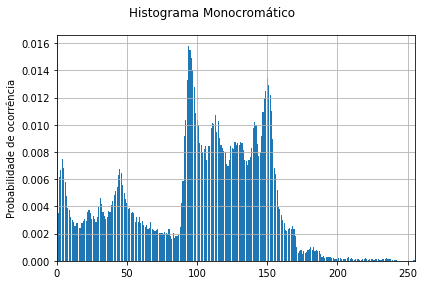

In [8]:
h,p,cdf = histogramas(f_cinza)
#plota_histogramas(h,p,cdf)
#plota_histogramas(h,p,cdf,escala_log=[False, True, False])

plota_individual(p, 'Histograma Monocromático', tipo='p')

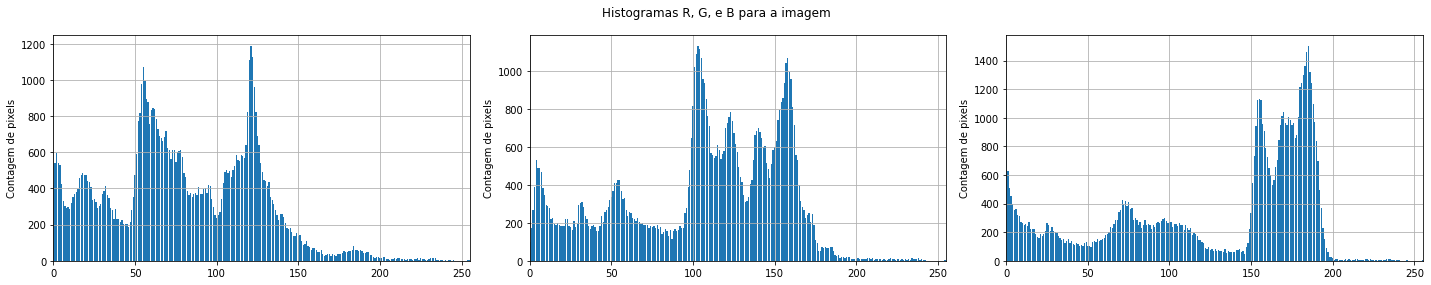

In [9]:
H,P,CDF = histogramas(f)

plota_histogramas(H[0],H[1],H[2],titulo='Histogramas R, G, e B para a imagem', tipos=['h','h','h'])

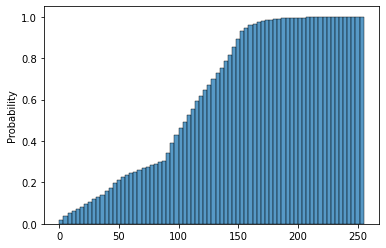

In [19]:
f_lin = np.reshape(f_cinza, f.shape[0]*f.shape[1])

sns.histplot(f_lin, stat='probability', cumulative=True)
plt.show()